# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

%matplotlib notebook

In [2]:
# Load dataset
elt_data = pd.read_excel('electricity_usuage_Seoul_2010-2020.xls')
temp_data = pd.read_csv('temperature_changes_Seoul_2010-2020.csv', encoding='cp949')

### The Region and Domain of Interest : 
### Seoul, South Korea / Temperature and Electricity usuage

### 1. Description of data

**1) electricity_usuage_Seoul_2010-2020**
* source link : https://data.seoul.go.kr/dataList/10601/C/2/datasetView.do
(the language is Korean)
* It is dataset about electricity comsumption in Seoul between 2010 and 2020.
* Each year is divided by district of Seoul and the purpose of usuage.
* The unit is MWh.
* In this visualization, I would like to see the whole usage in Seoul not dividing by district.


**2) temperature_changes_Seoul_2010-2020**
* source link : https://www.ncdc.noaa.gov/cdo-web/
    - documentaion : https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/NORMAL_DLY_documentation.pdf
* It is about daily air temperature measured at the station in Seoul between 2010 and 2020.
* There are two stations in this dataset, which are stations in Seoul and Incheon.
* The unit is Fahrenheit.
* In this visualization, I'm going to use the records from Seoul station.
    

### 2. Research question
** How much the temperature in Seoul has changed last 10 years and are there any relationship between changes in temperature and electricity consumption?**

In [3]:
elt_data.head()

,기간,자치구,합계,주택용,일반용,교육용,산업용,농사용,가로등,심야
0,2010,합계,47295102,13456730,25608866,1647540,5582689,21819,387552,589906
1,2010,종로구,1779871,236301,1311241,87655,71211,23,12726,60714
2,2010,중구,2705372,184800,2122807,46273,282673,73,20810,47936
3,2010,용산구,1450506,398389,727618,58682,234861,-,16291,14665
4,2010,성동구,1866384,407852,600704,85087,749886,-,14320,8535


### Transform elt_data

In [4]:
# Change column names to English
elt_data.columns = ['year', 'district', 'sum', 'residential', 'general', 'educational','industrial', 'farming', 'street lamp', 'late night']

In [5]:
# Filter the only sum rows
elt_data = elt_data[elt_data['district']== '합계']

In [6]:
elt_data.head()

,year,district,sum,residential,general,educational,industrial,farming,street lamp,late night
0,2010,합계,47295102,13456730,25608866,1647540,5582689,21819,387552,589906
26,2011,합계,46902983,13298588,25633101,1656355,5374206,18844,378351,543538
52,2012,합계,47234101,13735707,25688373,1706552,5179386,18106,375053,530924
78,2013,합계,46555102,13626047,25240317,1693802,5112318,17197,364682,500739
104,2014,합계,45018862,13184725,24429498,1572966,4984657,16442,362032,468542


In [7]:
elt_data_info = elt_data[['year', 'residential', 'general', 'educational','industrial', 'farming', 'street lamp', 'late night']]
elt_data_info.set_index('year', inplace=True)

In [8]:
# Convert the unit to GWh
elt_data_info = elt_data_info[[ 'residential', 'general', 'educational','industrial', 'farming', 'street lamp', 'late night']].apply(lambda x:x/1000)
elt_data_info

,residential,general,educational,industrial,farming,street lamp,late night
year,,,,,,,
2010,13456.730,25608.866,1647.540,5582.689,21.819,387.552,589.906
2011,13298.588,25633.101,1656.355,5374.206,18.844,378.351,543.538
2012,13735.707,25688.373,1706.552,5179.386,18.106,375.053,530.924
2013,13626.047,25240.317,1693.802,5112.318,17.197,364.682,500.739
2014,13184.725,24429.498,1572.966,4984.657,16.442,362.032,468.542
2015,13261.092,24638.161,1611.334,5021.983,16.787,355.339,476.786
2016,13612.456,25278.064,1669.649,5089.136,16.874,349.027,478.027
2017,13443.515,25245.753,1710.673,5083.847,17.069,339.489,457.812
2018,14097.306,25955.905,1777.417,5175.317,17.283,326.089,460.893


### Transform temp_data

In [9]:
temp_data.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,KSM00047108,"SEOUL CITY, KS",2010-01-01,22,26.0,9.0
1,KSM00047108,"SEOUL CITY, KS",2010-01-02,23,32.0,NaN
2,KSM00047108,"SEOUL CITY, KS",2010-01-03,21,26.0,13.0
3,KSM00047108,"SEOUL CITY, KS",2010-01-04,20,26.0,NaN
4,KSM00047108,"SEOUL CITY, KS",2010-01-05,13,19.0,NaN


In [10]:
temp_data['STATION'].unique()

array(['KSM00047108', 'KS000047112'], dtype=object)

In [11]:
temp_data['NAME'].unique()

array(['SEOUL CITY, KS', 'INCHEON, KS'], dtype=object)

In [12]:
temp_data = temp_data[temp_data['NAME'] == 'SEOUL CITY, KS']

In [13]:
# I'm going to use the average temperature, not max and min.
# Compute the temperature unit to Celcius degree.

temp_data['TAVG'] = temp_data['TAVG'].apply(lambda x : round((x-32)*(5/9),1) )

In [14]:
temp_data2 = temp_data[['DATE','TAVG']]

In [15]:
temp_data2['DATE'] = pd.to_datetime(temp_data2['DATE'])

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
temp_data2['dayofyear'] = temp_data2['DATE'].dt.dayofyear

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
# Remove 02-29
temp_data2[temp_data2['dayofyear'] == 60]

,DATE,TAVG,dayofyear
59,2010-03-01,2.2,60
424,2011-03-01,-0.6,60
789,2012-02-29,6.7,60
1155,2013-03-01,-1.1,60
1520,2014-03-01,5.6,60
1885,2015-03-01,1.7,60
2250,2016-02-29,-4.4,60
2616,2017-03-01,4.4,60
2981,2018-03-01,-2.2,60
3346,2019-03-01,6.7,60


In [18]:
temp_data2 = temp_data2.drop([789,2250,3711],axis = 0)

In [19]:
year_data_dict = {}

for i in range(2010, 2021):
    year_data_dict[i] = temp_data2[temp_data2['DATE'].isin(pd.date_range(str(i)+'-01-01', str(i)+'-12-31'))]['TAVG'].values

In [20]:
temp_data_year = pd.DataFrame(year_data_dict, 
                              index = pd.date_range(start = '2010-01-01', end = '2010-12-31')) #to use the date between Jan and Dec

In [21]:
temp_data_year.head(3)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2010-01-01,-5.6,-6.7,-4.4,-5.0,3.9,-7.8,2.8,3.9,-1.1,-5.0,-1.1
2010-01-02,-5.0,-5.6,-4.4,-13.3,1.1,-6.1,6.7,3.9,-2.8,-4.4,0.6
2010-01-03,-6.1,-4.4,-5.0,-12.8,2.2,-0.6,6.1,2.8,-5.0,-2.8,0.0


In [22]:
#transpose
temp_data_year_trans = temp_data_year.transpose()

In [23]:
temp_data_year_trans['mean'] = round(temp_data_year_trans.mean(axis = 1),1)
temp_data_year_trans['max'] = temp_data_year_trans.max(axis = 1)
temp_data_year_trans['min'] = temp_data_year_trans.min(axis = 1)

In [24]:
temp_data_year_info = temp_data_year_trans[['mean','max','min']]

In [25]:
temp_data_year_info

,mean,max,min
2010,12.2,29.4,-13.3
2011,12.1,29.4,-13.9
2012,12.3,31.7,-13.9
2013,12.6,29.4,-13.3
2014,13.4,31.1,-9.4
2015,13.6,30.0,-10.6
2016,13.6,31.1,-13.9
2017,13.1,31.7,-9.4
2018,13.0,33.9,-14.4
2019,13.6,31.7,-6.7


### Visualization

<IPython.core.display.Javascript object>


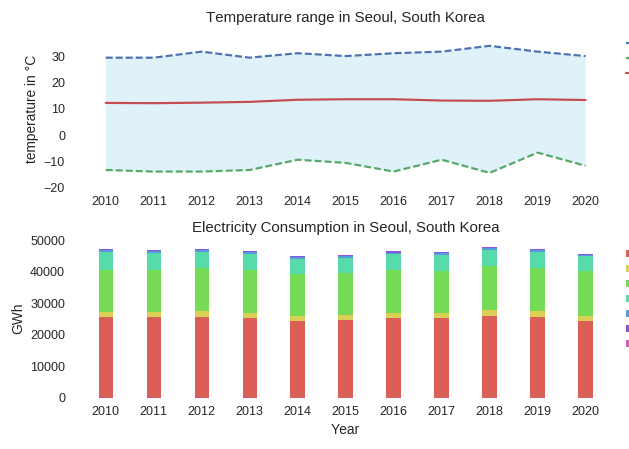

In [26]:
fig = plt.figure(figsize=(7,5))

# First plot - Temperature
ax1 = plt.subplot(2,1,1)
ax1.set_facecolor('white')
plt.plot(temp_data_year_info['max'],'--', temp_data_year_info['min'],'--')
plt.gca().fill_between(range(2010,2021,1), 
                       temp_data_year_info['max'], temp_data_year_info['min'], 
                       facecolor='skyblue', 
                       alpha=0.25)
plt.plot(temp_data_year_info['mean'],'-')
plt.ylim([-20, 40])

year = temp_data_year_info.index
plt.xticks(range(2010,2021,1))
plt.yticks(range(-20,40,10))
plt.ylabel('temperature in °C')
plt.title('Temperature range in Seoul, South Korea')
lgd1 = plt.legend(['Max temperature of the year','Min temperature of the year',
           'Average temperature of the year']
          ,fontsize = 8 , bbox_to_anchor = (1,1), loc = 'upper left',frameon = False)


# Second plot - Electricity Consumption
ax2 = plt.subplot(2,1,2, sharex = ax1)
ax2.set_facecolor('white')
cols = ['general', 'educational', 'residential', 'industrial',
        'late night', 'street lamp', 'farming']
colors = sns.color_palette('hls', len(cols))

xvals = elt_data_info.index

bottoms = len(elt_data_info) * [0]

for i in range(len(cols)):
    plt.bar(xvals, elt_data_info[cols[i]], width = 0.3, color =  colors[i],
             bottom = bottoms)
    bottoms += elt_data_info[cols[i]]

plt.xlabel('Year')
plt.ylabel('GWh')
plt.title('Electricity Consumption in Seoul, South Korea')
lgd2 = plt.legend(cols,fontsize = 8, frameon = False, bbox_to_anchor=(1,1) , loc = 'upper left')
plt.tight_layout( h_pad = 1)
fig.tight_layout(pad = 1, h_pad = 1, w_pad = 0.5)

plt.savefig('samplefigure', bbox_extra_artists=(lgd1, lgd2), bbox_inches='tight')
